In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
f = lambda x: x**2 - 15*x +1
Df = lambda x: 2*x -15
DDf = lambda x: 2

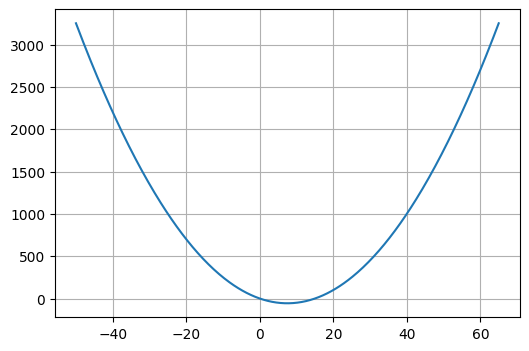

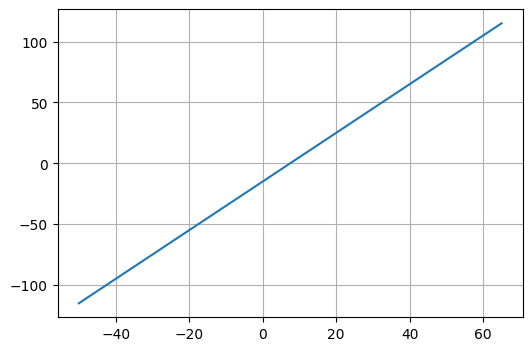

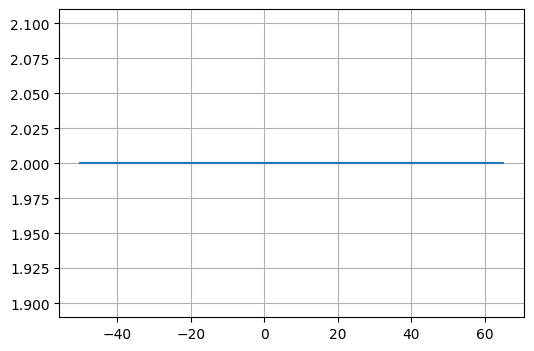

In [3]:
x = np.linspace(-50,65,400)

plt.figure(figsize=(6,4))
y=f(x)
plt.plot(x,y)
plt.grid(True)
plt.show()

plt.figure(figsize=(6,4))
yd=Df(x)
plt.plot(x,yd)
plt.grid(True)
plt.show()
plt.figure(figsize=(6,4))
ydd = np.full_like(x, 2)

plt.plot(x,ydd)
plt.grid(True)
plt.show()

In [4]:
def newtons_method(x, eps, lr,max_iters=100):
    for i in range(max_iters):
        grad = Df(x)
        hessian = DDf(x)
        if abs(grad) < eps:
            break
        if lr > 0:
            x = x - lr * (grad/hessian)
        else:
            x = x- grad/hessian
    
    return x, grad, i

In [5]:
def gradient_descent(x, lr, eps, max_iters):
    for i in range(max_iters):
        grad = Df(x)
        if abs(grad) < eps:
            break
        x = x - lr * grad
    return x, grad, i

In [6]:
gd_min, gd_grad,i = gradient_descent(40, 0.01, 0.1,321)
print("GD Results with x0 =40, lr=0.01, epsilon=0.1")
print(f"Found solution after {i} iterations.")
print("x_min = ", gd_min)
print("Gradient = ", gd_grad)


GD Results with x0 =40, lr=0.01, epsilon=0.1
Found solution after 320 iterations.
x_min =  7.549596800192111
Gradient =  0.10121795957573632


In [7]:
newton_min, newton_grad, i = newtons_method(40, 0.1,0)
print("Newton Results with x0 =40, epsilon=0.1")
print(f"Found soulution after {i} iterations.")
print("x_min = ", newton_min)
print("Gradient = ", newton_grad)

Newton Results with x0 =40, epsilon=0.1
Found soulution after 1 iterations.
x_min =  7.5
Gradient =  0.0


In [8]:
newton_min, newton_grad, i = newtons_method(40, 0.1, 0.8)
print("Newton Results with x0 =40, epsilon=0.1")
print(f"Found soulution after {i} iterations.")
print("x_min = ", newton_min)
print("Gradient = ", newton_grad)

Newton Results with x0 =40, epsilon=0.1
Found soulution after 5 iterations.
x_min =  7.5104
Gradient =  0.020799999999999486


In [9]:
from sympy import *
from sympy.plotting import plot3d

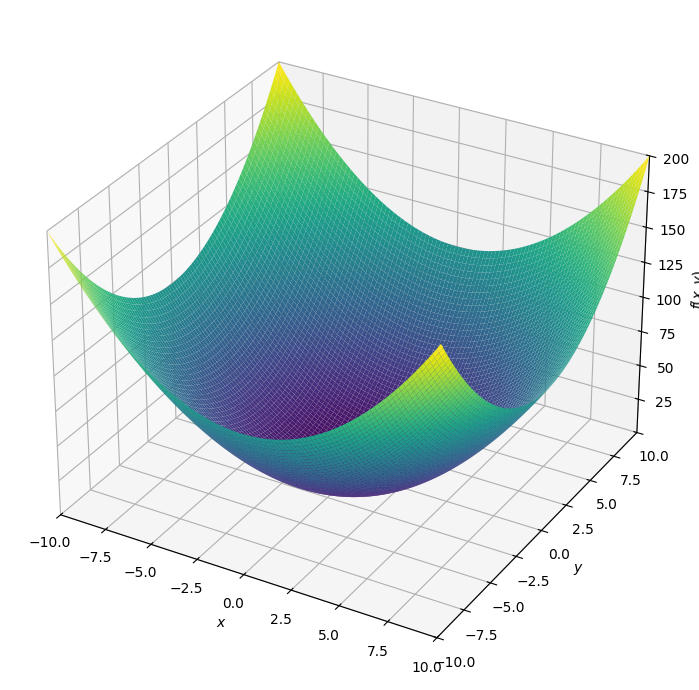

In [10]:
x,y = symbols('x y')
f = x**2 + y**2
plot3d(f,size=(10,7))
plt.show()

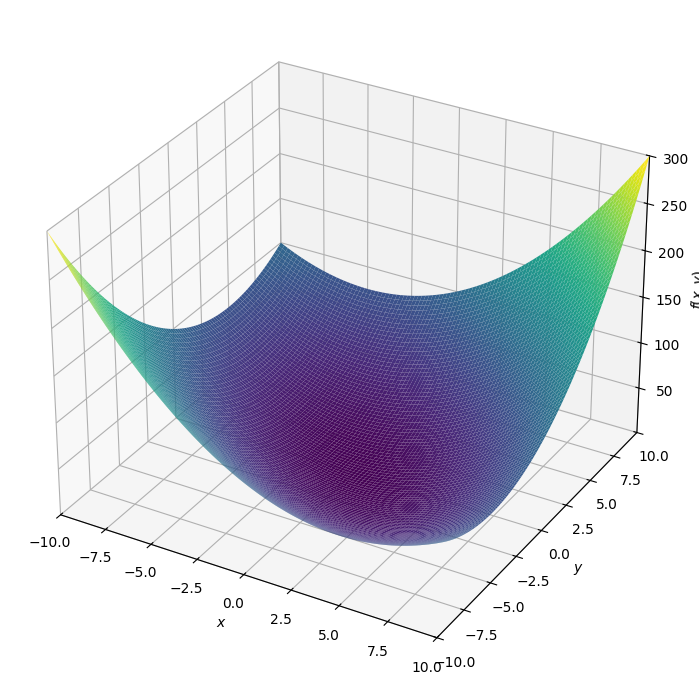

In [11]:
x,y = symbols('x y')
f = x**2 + x * y + y**2
plot3d(f,size=(10,7))
plt.show()

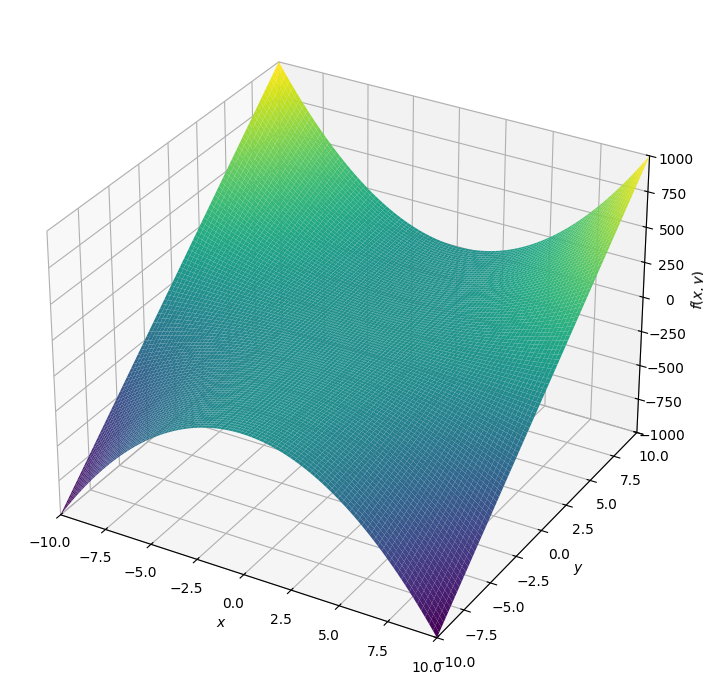

In [12]:
x,y = symbols('x y')
f = x**2 * y
plot3d(f,size=(10,7))
plt.show()

In [13]:
f_1 = lambda x: x[0]**2  + y[0]**2
Df_1 = lambda X: np.array([2*X[0],2*X[1]])
DDf_1 = lambda X: np.array([[2,0],
                         [0,2]])

In [14]:
f_2 = lambda x: x**2 + x*y + y**2
Df_2 = lambda X: np.array([2*X[0]+X[1],2*X[1]+X[0]])
DDf_2 = lambda X: np.array([[2,1],
                        [1,2]])

In [15]:
def GD_multi(f, gradf, x0, lr, eps, max_iter=1000):
    x = np.array(x0)
    x_all = [x.copy()]

    for i in range(max_iter):
        grad = gradf(x)
        if np.linalg.norm(grad)<eps:
            break
        x = x -lr*grad
        x_all.append(x.copy())
    return x, grad, i, x_all

In [16]:
x1, grad1, i1, x_all1 = GD_multi(f_1, Df_1, (10,10), 0.1, 0.001, 1000)

In [17]:
print(f"Found solution after {i1} iterations.")
print("xy_min =", x1)
print("Gradient = ", grad1)

Found solution after 46 iterations.
xy_min = [0.00034845 0.00034845]
Gradient =  [0.0006969 0.0006969]


In [18]:
x2, grad2, i2, x_all2 = GD_multi(f_1, Df_1, (10,10), 0.5, 0.001, 1000)

In [19]:
print(f"Found solution after {i2} iterations.")
print("xy_min =", x2)
print("Gradient = ", grad2)

Found solution after 1 iterations.
xy_min = [0. 0.]
Gradient =  [0. 0.]


In [20]:
def NewtonMethod(f, grad_f, hessian_f, x0, eps,lr, max_iters=1000):
    x = np.array(x0)
    newton_x_all = [x.copy()]

    for i in range(max_iters):
        grad = grad_f(x)  
        if np.linalg.norm(grad) < eps: 
            break
        hessian_inv = np.linalg.inv(hessian_f(x))
        if lr>0:
            x = x - lr * np.dot(hessian_inv, grad)
        else:
            x = x - np.dot(hessian_inv, grad)
        newton_x_all.append(x.copy())

    return x, grad, i, newton_x_all

In [21]:
nx1, ngrad1, ni1, nx_all1 = NewtonMethod(f_1, Df_1, DDf_1,(10,10) , 0.001, 0)

In [22]:
print(f"Found solution after {ni1} iterations.")
print("xy_min =", nx1)
print("Gradient = ", ngrad1)

Found solution after 1 iterations.
xy_min = [0. 0.]
Gradient =  [0. 0.]


In [23]:
nx2, ngrad2, ni2, nx_all2 = NewtonMethod(f_1, Df_1, DDf_1,(10,10) , 0.001, 0.5)

In [24]:
print(f"Found solution after {ni2} iterations.")
print("xy_min =", nx2)
print("Gradient = ", ngrad2)

Found solution after 15 iterations.
xy_min = [0.00030518 0.00030518]
Gradient =  [0.00061035 0.00061035]


In [25]:
x3, grad3, i3, x_all3 = GD_multi(f_2, Df_2, (10,10), 0.5, 0.001)

In [26]:
print(f"Found solution after {i3} iterations.")
print("xy_min =", x3)
print("Gradient = ", grad3)

Found solution after 16 iterations.
xy_min = [0.00015259 0.00015259]
Gradient =  [0.00045776 0.00045776]


In [27]:
nx3, ngrad3, ni3, nx_all3 = NewtonMethod(f_2, Df_2, DDf_2,(10,10) , 0.001, 0)

In [28]:
print(f"Found solution after {ni3} iterations.")
print("xy_min =", nx3)
print("Gradient = ", ngrad3)

Found solution after 1 iterations.
xy_min = [0. 0.]
Gradient =  [0. 0.]


In [29]:
nx4, ngrad4, ni4, nx_all4 = NewtonMethod(f_2, Df_2, DDf_2,(10,10) , 0.001, 0.9)
print(f"Found solution after {ni4} iterations.")
print("xy_min =", nx4)
print("Gradient = ", ngrad4)

Found solution after 5 iterations.
xy_min = [1.e-04 1.e-04]
Gradient =  [0.0003 0.0003]


In [30]:
f_5 = lambda x: x**2 * y
Df_5 = lambda X: np.array([2*X[0]*X[1],
                           X[0]**2])
DDf_5 = lambda X: np.array([[2*X[1],2*X[0]],
                         [2*X[0],0]])

In [31]:
x4, grad4, i4, x_all4 = GD_multi(f_5, Df_5, (10,10), 0.01, 0.001)
print(f"Found solution after {i4} iterations.")
print("xy_min =", x4)
print("Gradient = ", grad4)

Found solution after 79 iterations.
xy_min = [6.80598421e-05 6.85061189e+00]
Gradient =  [9.32503127e-04 4.63214210e-09]


In [32]:
nx5, ngrad5, ni5, nx_all5 = NewtonMethod(f_5, Df_5, DDf_5,(10,10) , 0.001, 0)
print(f"Found solution after {ni5} iterations.")
print("xy_min =", nx5)
print("Gradient = ", ngrad5)

Found solution after 9 iterations.
xy_min = [0.01953125 0.01953125]
Gradient =  [0.00076294 0.00038147]


In [45]:
f_4 = lambda X: X[0]**2 + X[1]**2
Df_4 = lambda X: 2 * X

f_6 = lambda X: X[0]**2 + X[0]*X[1] + X[1]**2
Df_6 = lambda X: np.array([[2*X[0] + X[1]], [2*X[1] + X[0]]])

f_7 = lambda X: X[0]**2 * X[1]
Df_7 = lambda X: np.array([2*X[0] * X[1], X[0]**2])

In [81]:
def BFGS(f, grad, xk_1, X,eps, max_iters):
    xk_1 = np.array(xk_1, dtype=float).reshape(-1, 1)
    xk = np.array(X, dtype=float).reshape(-1, 1)
    
    n = len(xk_1)
    hess = np.eye(n)
    
    g = grad(xk).reshape(-1,1)
    gxk_1 = grad(xk_1).reshape(-1,1)
    
    s = xk - xk_1
    y = g - gxk_1

    ys = (y.T @ s).item() if y.T @ s != 0 else 1e-8
    yyB = (y.T @ hess @ y).item() if y.T @ hess @ y != 0 else 1e-8

    if ys > 1e-8 and yyB > 1e-8:
        hess = hess + ((s @ s.T) / ys) - ((hess @ y @ y.T @ hess) / yyB)

    for i in range(max_iters):
        g = grad(xk).reshape(-1,1)

        print(f"Iteration {i}:")
        print("x_k:\n", xk.flatten())
        print("Gradient at x_k:\n", g.flatten())
        print("Norm of Gradient:", np.linalg.norm(g))

        if np.linalg.norm(g) < eps:
            break

        pk = -hess @ g
        x_new = xk + pk
        s = x_new - xk
        y = grad(x_new).reshape(-1,1) - g
        ys = (y.T @ s).item() if y.T @ s != 0 else 1e-8
        yyB = (y.T @ hess @ y).item() if y.T @ hess @ y != 0 else 1e-8

        if ys > 1e-8 and yyB > 1e-8:
            hess = hess + ((s @ s.T) / ys) - ((hess @ y @ y.T @ hess) / yyB)

        xk_1 = xk
        xk = x_new

        print("Updated inverse Hessian approximation:\n", hess)
        print(f"*** END OF ITERATION {i} ***\n")

    print("Final Result:")
    print("xy_min:", xk.flatten())
    print("Gradient", g.flatten())
    
    return xk.flatten(), g.flatten(), i + 1

In [82]:
X1, g,i_bfgs1 = BFGS(f_4, Df_4, (10,10),(9,9), 0.001, 3)

Iteration 0:
x_k:
 [9. 9.]
Gradient at x_k:
 [18. 18.]
Norm of Gradient: 25.45584412271571
Updated inverse Hessian approximation:
 [[ 0.75 -0.25]
 [-0.25  0.75]]
*** END OF ITERATION 0 ***

Iteration 1:
x_k:
 [0. 0.]
Gradient at x_k:
 [0. 0.]
Norm of Gradient: 0.0
Final Result:
xy_min: [0. 0.]
Gradient [0. 0.]


In [83]:
def BFGS_lr(f, grad, xk_1, X, lr,eps, max_iters):
    xk_1 = np.array(xk_1, dtype=float).reshape(-1, 1)
    xk = np.array(X, dtype=float).reshape(-1, 1)
    
    n = len(xk_1)
    hess = np.eye(n)
    
    g = grad(xk).reshape(-1,1)
    gxk_1 = grad(xk_1).reshape(-1,1)
    
    s = xk - xk_1
    y = g - gxk_1

    ys = (y.T @ s).item() if y.T @ s != 0 else 1e-8
    yyB = (y.T @ hess @ y).item() if y.T @ hess @ y != 0 else 1e-8

    if ys > 1e-8 and yyB > 1e-8:
        hess = hess + ((s @ s.T) / ys) - ((hess @ y @ y.T @ hess) / yyB)

    for i in range(max_iters):
        g = grad(xk).reshape(-1,1)

        print(f"Iteration {i}:")
        print("x_k:\n", xk.flatten())
        print("Gradient at x_k:\n", g.flatten())
        print("Norm of Gradient:", np.linalg.norm(g))

        if np.linalg.norm(g) < eps:
            break

        pk = -hess @ g
        x_new = xk + lr*pk
        s = x_new - xk
        y = grad(x_new).reshape(-1,1) - g
        ys = (y.T @ s).item() if y.T @ s != 0 else 1e-8
        yyB = (y.T @ hess @ y).item() if y.T @ hess @ y != 0 else 1e-8

        if ys > 1e-8 and yyB > 1e-8:
            hess = hess + ((s @ s.T) / ys) - ((hess @ y @ y.T @ hess) / yyB)

        xk_1 = xk
        xk = x_new

        print("Updated inverse Hessian approximation:\n", hess)
        print(f"*** END OF ITERATION {i} ***\n")

    print("Final Result:")
    print("xy_min:", xk.flatten())
    print("Gradient", g.flatten())
    
    return xk.flatten(), g.flatten(), i + 1

In [84]:
X1, g,i_bfgs1 = BFGS_lr(f_4, Df_4, (10,10),(9,9), 0.9,0.001, 6)

Iteration 0:
x_k:
 [9. 9.]
Gradient at x_k:
 [18. 18.]
Norm of Gradient: 25.45584412271571
Updated inverse Hessian approximation:
 [[ 0.75 -0.25]
 [-0.25  0.75]]
*** END OF ITERATION 0 ***

Iteration 1:
x_k:
 [0.9 0.9]
Gradient at x_k:
 [1.8 1.8]
Norm of Gradient: 2.545584412271572
Updated inverse Hessian approximation:
 [[ 0.75 -0.25]
 [-0.25  0.75]]
*** END OF ITERATION 1 ***

Iteration 2:
x_k:
 [0.09 0.09]
Gradient at x_k:
 [0.18 0.18]
Norm of Gradient: 0.25455844122715704
Updated inverse Hessian approximation:
 [[ 0.75 -0.25]
 [-0.25  0.75]]
*** END OF ITERATION 2 ***

Iteration 3:
x_k:
 [0.009 0.009]
Gradient at x_k:
 [0.018 0.018]
Norm of Gradient: 0.025455844122715694
Updated inverse Hessian approximation:
 [[ 0.75 -0.25]
 [-0.25  0.75]]
*** END OF ITERATION 3 ***

Iteration 4:
x_k:
 [0.0009 0.0009]
Gradient at x_k:
 [0.0018 0.0018]
Norm of Gradient: 0.0025455844122715702
Updated inverse Hessian approximation:
 [[ 0.75 -0.25]
 [-0.25  0.75]]
*** END OF ITERATION 4 ***

Iteration

In [85]:
X2, g2,i_bfgs2 = BFGS(f_6, Df_6, (10,10),(9,9), 0.001, 2)

Iteration 0:
x_k:
 [9. 9.]
Gradient at x_k:
 [27. 27.]
Norm of Gradient: 38.18376618407357
Updated inverse Hessian approximation:
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
*** END OF ITERATION 0 ***

Iteration 1:
x_k:
 [-1.77635684e-15 -1.77635684e-15]
Gradient at x_k:
 [-5.32907052e-15 -5.32907052e-15]
Norm of Gradient: 7.53644380168212e-15
Final Result:
xy_min: [-1.77635684e-15 -1.77635684e-15]
Gradient [-5.32907052e-15 -5.32907052e-15]


In [86]:
X3, g3,i_bfgs3 = BFGS_lr(f_6, Df_6, (10,10),(9,9), 0.9,0.001, 6)

Iteration 0:
x_k:
 [9. 9.]
Gradient at x_k:
 [27. 27.]
Norm of Gradient: 38.18376618407357
Updated inverse Hessian approximation:
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
*** END OF ITERATION 0 ***

Iteration 1:
x_k:
 [0.9 0.9]
Gradient at x_k:
 [2.7 2.7]
Norm of Gradient: 3.8183766184073504
Updated inverse Hessian approximation:
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
*** END OF ITERATION 1 ***

Iteration 2:
x_k:
 [0.09 0.09]
Gradient at x_k:
 [0.27 0.27]
Norm of Gradient: 0.3818376618407351
Updated inverse Hessian approximation:
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
*** END OF ITERATION 2 ***

Iteration 3:
x_k:
 [0.009 0.009]
Gradient at x_k:
 [0.027 0.027]
Norm of Gradient: 0.03818376618407348
Updated inverse Hessian approximation:
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
*** END OF ITERATION 3 ***

Iteration 4:
x_k:
 [0.0009 0.0009]
Gradient at x_k:
 [0.0027 0.0027]
Norm of Gradient: 0.0038183766184073484
Updated inver

In [87]:
X6, g6,i_bfgs6 = BFGS(f_7, Df_7, (10,10),(9,9), 0.001, 14)

Iteration 0:
x_k:
 [9. 9.]
Gradient at x_k:
 [162.  81.]
Norm of Gradient: 181.12150617748296
Updated inverse Hessian approximation:
 [[ 0.22426564 -0.37573436]
 [-0.37573436  0.82426564]]
*** END OF ITERATION 0 ***

Iteration 1:
x_k:
 [4.73684211 4.73684211]
Gradient at x_k:
 [44.87534626 22.43767313]
Norm of Gradient: 50.172162376033995
Updated inverse Hessian approximation:
 [[ 0.24251543 -0.35748457]
 [-0.35748457  0.84251543]]
*** END OF ITERATION 1 ***

Iteration 2:
x_k:
 [3.10344828 3.10344828]
Gradient at x_k:
 [19.2627824  9.6313912]
Norm of Gradient: 21.536445443220227
Updated inverse Hessian approximation:
 [[ 0.26695527 -0.33304473]
 [-0.33304473  0.86695527]]
*** END OF ITERATION 2 ***

Iteration 3:
x_k:
 [1.875 1.875]
Gradient at x_k:
 [7.03125  3.515625]
Norm of Gradient: 7.8611764833974105
Updated inverse Hessian approximation:
 [[ 0.30951111 -0.29048889]
 [-0.29048889  0.90951111]]
*** END OF ITERATION 3 ***

Iteration 4:
x_k:
 [1.16883117 1.16883117]
Gradient at x_k:
